# Initializers

In [1]:
import tensorflow as tf

dense_glorot_initializer = tf.keras.layers.Dense(50, activation="relu") # Glorot is the default
dense_he_initializer = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

# Custom initializer (adjusting scale, fan mode and distribution)
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2.0, mode="fan_avg", distribution="uniform")
dense_custom_he_avg = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

2025-10-14 17:49:45.733107: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Better activation functions

In [2]:
# Leaky ReLU
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

# It could be added as a separate layer. In this case, the layer is left with no activation function and the
# activation function goes as a layer.
model = tf.keras.models.Sequential([
    # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"), # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2), # activation as a separate layer
    # more layers
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


# Batch normalization

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1760474988.817305     667 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [5]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [6]:
# Batch normalization before the activation function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [7]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

# Faster optimizers

In [8]:
# Momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [9]:
# Nesterov Accelerated Gradient (NAG)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [10]:
# RMSProp
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
# Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Learning rate scheduling

In [12]:
# power scheduling
optimize = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

/home/julio/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [13]:
# exponential scheduling
def exponential_decay_fn(epoch):
    learning_rate = 0.01
    steps = 20
    return learning_rate * (0.1 ** (epoch // steps))

# the same but with eta0 (learning_rate) and s not hardcoded
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * (0.1 ** (epoch // s))
    return exponential_decay_fn


In [14]:
for i in range(0, 41):
    print("exponential_decay_fn({}) -> {}".format(i, exponential_decay_fn(i)))

exponential_decay_fn(0) -> 0.01
exponential_decay_fn(1) -> 0.01
exponential_decay_fn(2) -> 0.01
exponential_decay_fn(3) -> 0.01
exponential_decay_fn(4) -> 0.01
exponential_decay_fn(5) -> 0.01
exponential_decay_fn(6) -> 0.01
exponential_decay_fn(7) -> 0.01
exponential_decay_fn(8) -> 0.01
exponential_decay_fn(9) -> 0.01
exponential_decay_fn(10) -> 0.01
exponential_decay_fn(11) -> 0.01
exponential_decay_fn(12) -> 0.01
exponential_decay_fn(13) -> 0.01
exponential_decay_fn(14) -> 0.01
exponential_decay_fn(15) -> 0.01
exponential_decay_fn(16) -> 0.01
exponential_decay_fn(17) -> 0.01
exponential_decay_fn(18) -> 0.01
exponential_decay_fn(19) -> 0.01
exponential_decay_fn(20) -> 0.001
exponential_decay_fn(21) -> 0.001
exponential_decay_fn(22) -> 0.001
exponential_decay_fn(23) -> 0.001
exponential_decay_fn(24) -> 0.001
exponential_decay_fn(25) -> 0.001
exponential_decay_fn(26) -> 0.001
exponential_decay_fn(27) -> 0.001
exponential_decay_fn(28) -> 0.001
exponential_decay_fn(29) -> 0.001
exponentia

## Should be used in a callback

In [15]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# history = model.fit(X_train, y_train, [...], callbacks=[lr_scheduler])

# Regularizing the model

## Dropout

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

# Monte Carlo (MC) Dropout

In [18]:
import numpy as np

# y_probas = np.stack([model(X_test, training=True)
#                      for sample in range(100)])
# y_proba = y_probas.mean(axis=0)

# Exercises

## 8

### a

In [19]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

### b

In [20]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [21]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [22]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [23]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y%m%d_%H%M%S")


run_logdir = get_run_logdir()

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-14 17:49:50.713994: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 17:49:50.714017: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
I0000 00:00:1760474990.714030     667 cupti_tracer.cc:1082] Profiler found 1 GPUs
W0000 00:00:1760474990.731692     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-14 17:49:50.731861: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760474990.731975     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 135/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0988 - loss: 54.3045

2025-10-14 17:49:54.262929: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 17:49:54.262965: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760474994.264687     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 190/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1061 - loss: 43.1008

2025-10-14 17:49:54.761592: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760474994.782655     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760474994.868252     667 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760474994.868305     667 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-10-14 17:49:54.924137: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-14 17:49:54.939308: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251014_174950/train/plugins/profile/2025_10_14_17_49_54/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2095 - loss: 3.6370 - val_accuracy: 0.2016 - val_loss: 2.1406
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2659 - loss: 1.9599 - val_accuracy: 0.2972 - val_loss: 1.9053
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2925 - loss: 1.9095 - val_accuracy: 0.3006 - val_loss: 1.8962
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3170 - loss: 1.8610 - val_accuracy: 0.2822 - val_loss: 1.9377
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3324 - loss: 1.8293 - val_accuracy: 0.3372 - val_loss: 1.8463
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3419 - loss: 1.8043 - val_accuracy: 0.3252 - val_loss: 1.8603
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3509 - loss: 1.7773 - val_accuracy: 0.3618 - val_loss: 1.7321
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3593 - loss: 1.7542 - val_

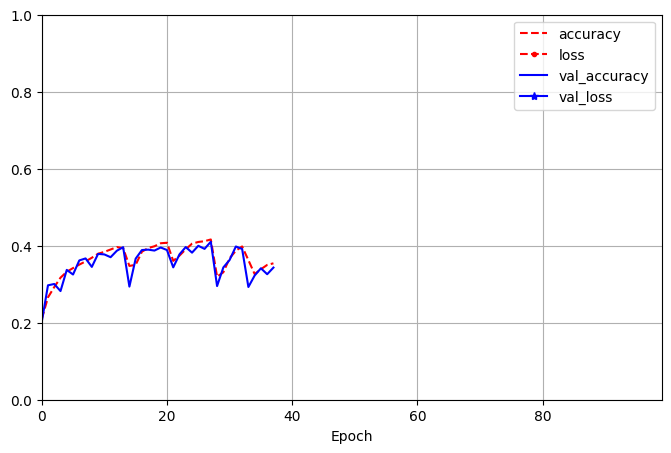

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [25]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4104 - loss: 1.6439


[1.6438945531845093, 0.41040000319480896]

### c

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [28]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-14 17:53:38.721447: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 17:53:38.721476: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760475218.723693     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-14 17:53:38.723806: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760475218.723934     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 117/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1209 - loss: 2.4399

2025-10-14 17:53:45.163312: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 17:53:45.163337: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760475225.165517     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 195/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1328 - loss: 2.3967

2025-10-14 17:53:46.152250: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760475226.211441     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760475226.341364     667 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760475226.341485     667 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152


 214/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.1355 - loss: 2.3875

2025-10-14 17:53:46.434342: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-14 17:53:46.439857: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251014_174950/train/plugins/profile/2025_10_14_17_53_46/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2814 - loss: 1.9656 - val_accuracy: 0.2956 - val_loss: 1.9193
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3748 - loss: 1.7461 - val_accuracy: 0.3310 - val_loss: 1.9344
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4128 - loss: 1.6563 - val_accuracy: 0.3628 - val_loss: 1.8765
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4321 - loss: 1.5948 - val_accuracy: 0.3212 - val_loss: 1.8795
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4525 - loss: 1.5448 - val_accuracy: 0.4196 - val_loss: 1.6769
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4718 - loss: 1.4980 - val_accuracy: 0.4022 - val_loss: 1.6554
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4839 - loss: 1.4531 - val_accuracy: 0.4224 - val_loss: 1.6645
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5023 - loss: 1.4107 

In [29]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5044 - loss: 1.4386


[1.4386327266693115, 0.5044000148773193]

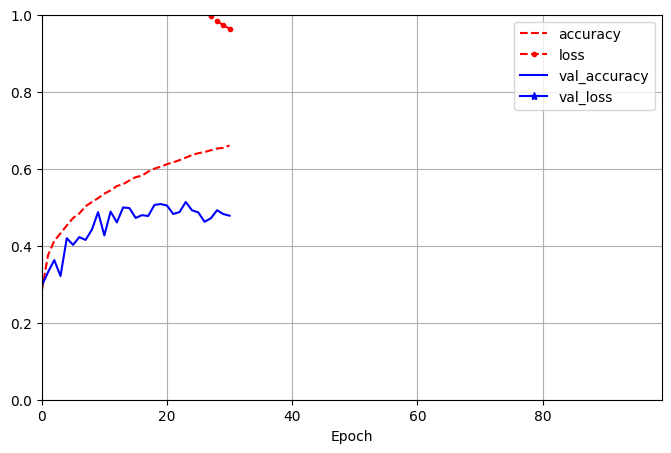

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

### d

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.Activation("selu"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-14 18:26:58.918896: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 18:26:58.918951: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760477218.923775     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-14 18:26:58.924001: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760477218.924221     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 130/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1179 - loss: 107.3768

2025-10-14 18:27:01.197148: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 18:27:01.197189: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760477221.199108     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 198/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1258 - loss: 79.7310

2025-10-14 18:27:01.727385: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760477221.764144     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760477221.850104     667 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760477221.850176     667 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-10-14 18:27:01.920232: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-14 18:27:01.926124: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251014_174950/train/plugins/profile/2025_10_14_18_27_01/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2205 - loss: 4.9801 - val_accuracy: 0.2150 - val_loss: 2.0909
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2803 - loss: 1.9575 - val_accuracy: 0.2686 - val_loss: 1.9862
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3125 - loss: 1.8824 - val_accuracy: 0.3150 - val_loss: 2.0124
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3210 - loss: 1.8560 - val_accuracy: 0.3360 - val_loss: 1.8218
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3347 - loss: 1.8279 - val_accuracy: 0.3388 - val_loss: 1.8017
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3461 - loss: 1.8016 - val_accuracy: 0.3490 - val_loss: 1.7536
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2223 - loss: 2.2427 - val_accuracy: 0.2284 - val_loss: 2.0218
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2517 - loss: 1.9529 - val_

In [34]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ -2s -14760us/step - accuracy: 0.3490 - loss: 1.7536


[1.7536410093307495, 0.3490000069141388]

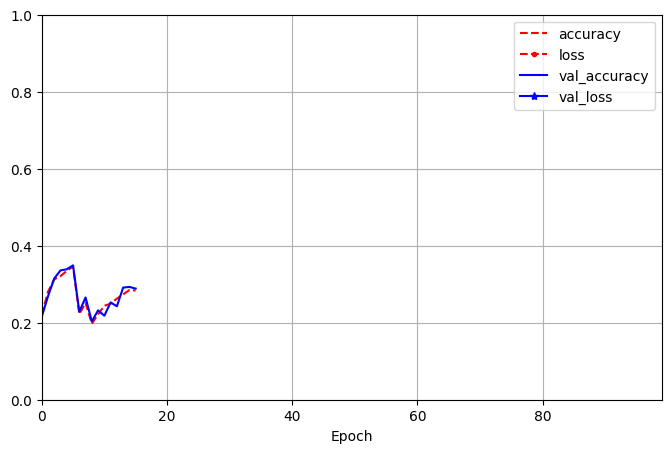

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

### e

In [41]:
import keras

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal", use_bias=False))
    
model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/cifar10_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

2025-10-14 20:17:26.575636: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 20:17:26.575682: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760483846.577476     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1
2025-10-14 20:17:26.577591: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1760483846.577676     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/100
 139/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1085 - loss: 63.3474

2025-10-14 20:17:28.852446: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-10-14 20:17:28.852485: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
W0000 00:00:1760483848.854473     667 cupti_tracer.cc:1337] Fail to use per-thread activity buffer, cupti trace overhead may be big. CUPTI ERROR CODE:1


 199/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1112 - loss: 50.2051

2025-10-14 20:17:29.347976: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1760483849.382420     667 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1760483849.467308     667 cupti_collector.cc:841]  GpuTracer has collected 0 callback api events and 0 activity events. 
I0000 00:00:1760483849.467352     667 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-10-14 20:17:29.534709: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-10-14 20:17:29.540342: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_logs/run_20251014_174950/train/plugins/profile/2025_10_14_20_17_29/DESKTOP-4IJAQSI.xplane.pb


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1834 - loss: 4.2660 - val_accuracy: 0.2210 - val_loss: 2.1108
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2414 - loss: 2.0171 - val_accuracy: 0.2512 - val_loss: 1.9558
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2462 - loss: 1.9932 - val_accuracy: 0.2680 - val_loss: 1.9635
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2678 - loss: 1.9494 - val_accuracy: 0.2760 - val_loss: 1.9443
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2724 - loss: 1.9303 - val_accuracy: 0.2568 - val_loss: 1.9917
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2802 - loss: 1.9104 - val_accuracy: 0.2812 - val_loss: 1.9090
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2916 - loss: 1.8849 - val_accuracy: 0.3236 - val_loss: 1.8782
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3067 - loss: 1.8459 - val_

In [42]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3236 - loss: 1.8782


[1.8782448768615723, 0.32359999418258667]

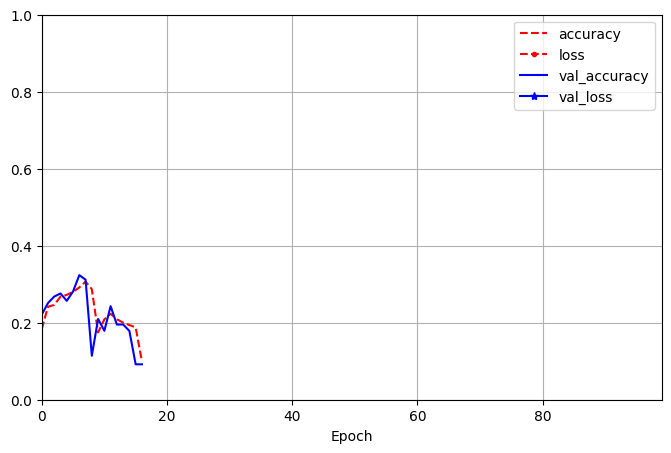

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()